<a href="https://colab.research.google.com/github/Aswin1910/Stock_Prediction/blob/main/Stock_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import yfinance as yf
ticker = yf.Ticker("ASIANPAINT.NS")
df = ticker.history(start="2024-05-10", end="2025-05-12", interval="1d")

In [ ]:
print(df.head())

                                  Open         High          Low        Close  \
Date                                                                            
2024-05-10 00:00:00+05:30  2668.561874  2761.106391  2639.987892  2739.997070   
2024-05-13 00:00:00+05:30  2739.997030  2862.351431  2723.040537  2846.779053   
2024-05-14 00:00:00+05:30  2846.532085  2855.430588  2809.949352  2833.826904   
2024-05-15 00:00:00+05:30  2833.826705  2841.835453  2774.503359  2781.968262   
2024-05-16 00:00:00+05:30  2789.235510  2805.598915  2755.124586  2782.314453   

                            Volume  Dividends  Stock Splits  
Date                                                         
2024-05-10 00:00:00+05:30  2478584        0.0           0.0  
2024-05-13 00:00:00+05:30  2748823        0.0           0.0  
2024-05-14 00:00:00+05:30   999330        0.0           0.0  
2024-05-15 00:00:00+05:30  1230520        0.0           0.0  
2024-05-16 00:00:00+05:30  1534319        0.0           0.0 

In [ ]:
df.index

DatetimeIndex(['2024-05-10 00:00:00+05:30', '2024-05-13 00:00:00+05:30',
               '2024-05-14 00:00:00+05:30', '2024-05-15 00:00:00+05:30',
               '2024-05-16 00:00:00+05:30', '2024-05-17 00:00:00+05:30',
               '2024-05-21 00:00:00+05:30', '2024-05-22 00:00:00+05:30',
               '2024-05-23 00:00:00+05:30', '2024-05-24 00:00:00+05:30',
               ...
               '2025-04-25 00:00:00+05:30', '2025-04-28 00:00:00+05:30',
               '2025-04-29 00:00:00+05:30', '2025-04-30 00:00:00+05:30',
               '2025-05-02 00:00:00+05:30', '2025-05-05 00:00:00+05:30',
               '2025-05-06 00:00:00+05:30', '2025-05-07 00:00:00+05:30',
               '2025-05-08 00:00:00+05:30', '2025-05-09 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=247, freq=None)

In [ ]:
dataset = df.to_numpy()

In [ ]:
X = dataset[:, :3]
y = dataset[:, 3].reshape(-1, 1)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

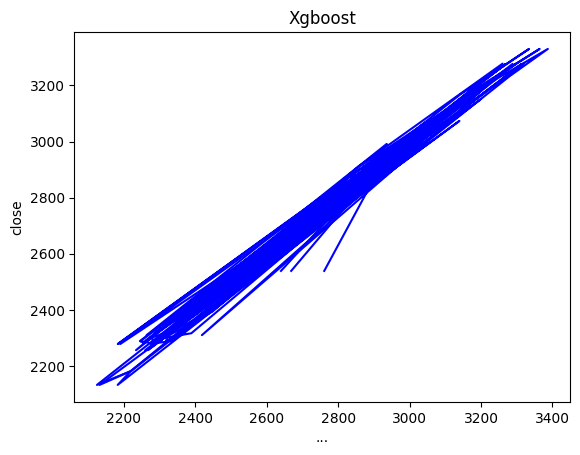

In [ ]:
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Xgboost')
plt.xlabel('...')
plt.ylabel('close')
plt.show()

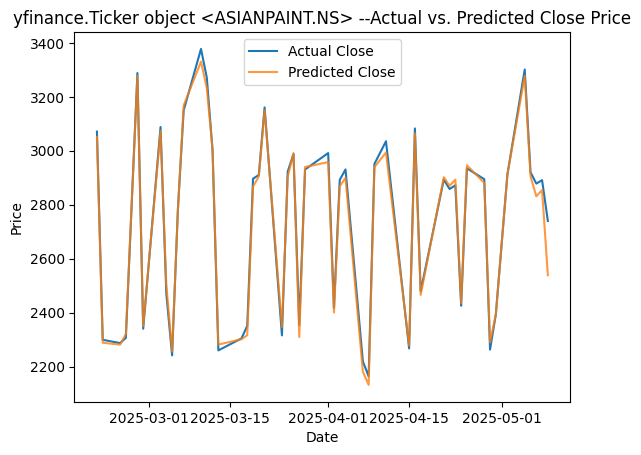

In [ ]:
test_start = int(len(df) * (1 - 0.2))
dates_test = df.index[test_start:]

plt.plot(dates_test, y_test, label="Actual Close")
plt.plot(dates_test, y_pred, label="Predicted Close", alpha=0.8)
plt.title(f"{ticker} --Actual vs. Predicted Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

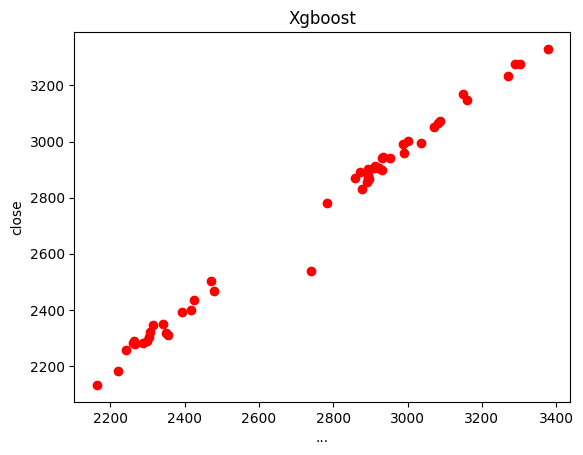

In [ ]:
plt.scatter(y_test, regressor.predict(X_test),color = 'red')
plt.title('Xgboost')
plt.xlabel('...')
plt.ylabel('close')
plt.show()

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3051.09 3071.04]
 [2288.66 2299.6 ]
 [2281.59 2287.4 ]
 [2320.94 2306.65]
 [3276.71 3288.21]
 [2350.51 2340.65]
 [3073.49 3088.11]
 [2503.36 2470.62]
 [2256.22 2241.8 ]
 [2779.15 2782.31]
 [3167.99 3149.45]
 [3330.13 3377.46]
 [3233.05 3271.44]
 [3002.8  3001.71]
 [2281.83 2260.35]
 [2301.74 2304.65]
 [2316.59 2351.15]
 [2867.42 2896.44]
 [2904.62 2910.51]
 [3149.53 3160.78]
 [2347.35 2316.  ]
 [2903.99 2922.79]
 [2991.55 2987.73]
 [2309.78 2354.35]
 [2939.68 2930.63]
 [2958.11 2991.52]
 [2400.7  2418.  ]
 [2868.65 2892.34]
 [2899.56 2930.88]
 [2181.57 2219.55]
 [2132.37 2164.15]
 [2939.68 2951.44]
 [2993.67 3035.4 ]
 [2278.12 2267.7 ]
 [3064.41 3082.77]
 [2465.93 2479.6 ]
 [2902.28 2893.19]
 [2870.39 2858.45]
 [2893.1  2872.04]
 [2436.09 2425.7 ]
 [2946.26 2934.82]
 [2880.98 2894.68]
 [2289.88 2263.4 ]
 [2393.7  2393.6 ]
 [2911.28 2912.06]
 [3277.69 3301.29]
 [2905.46 2920.59]
 [2831.35 2878.37]
 [2854.21 2891.09]
 [2538.8  2740.  ]]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9890520092236642